In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import patsy
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble  import RandomForestRegressor
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

import multiprocessing
import xgboost as xgb

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import multiprocessing
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [3]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 100)


In [4]:
path = "/Users/rafa/Desktop/Project/Data/FM 2023.csv"
df_original = pd.read_csv(path)

In [5]:
df = df_original.copy()

In [6]:
count = (df["Values"] >= 50000000).sum()
count

899

In [7]:
df.drop(df[df["Values"] >= 50000000].index, inplace=True)


In [8]:
df.drop(df[df["Values"] <= 50000].index, inplace=True)


In [9]:
df.drop(["Nationality","Rental club","Salary","Colour of skin","Date of birth","Number of national team appearances","Goals scored for the national team","Race","World reputation","Domestic reputation","Current reputation","RCA" ], axis=1,inplace=True)

In [10]:
df = pd.DataFrame(df)

columns_to_check = {
    "GK", "DL", "DC", "DR", "WBL", "WBR", "DM", "ML", "MC", "MR", "AML", "AMC", "AMR", "ST"
}

def find_column_name(row):
    for col_name in columns_to_check:
        if row[col_name] == 20:
            return col_name
    return None

df['Best_Position'] = df.apply(find_column_name, axis=1)


Cleaning

In [11]:
amr_df = df[(df["Best_Position"] == "AMC")]
amr_df = amr_df.reset_index(drop=True)
amr_df

,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
0,Pablo Sarabia,AM RLC,30,154,156,Paris Saint-Germain,15,15,15,15,17,15,7,13,5,7,15,13,6,17,10,13,11,13,13,16,14,9,15,8,15,8,15,14,15,16,15,6,12,14,13,10,14,9,15,10,15,2,1,1,1,2,1,2,2,3,4,1,7,12,10,10,12,14,14,10,1,1,1,1,10,1,1,15,13,15,17,20,19,1,174,70,20,10,36552285,67045428,AMC
1,Nabil Fekir,AM/S RLC,29,153,158,Real Hispalis,15,13,16,15,16,15,6,14,4,5,16,13,5,17,10,13,12,15,13,16,15,16,16,16,14,8,12,12,15,16,16,5,12,15,14,17,12,12,16,10,13,2,1,2,2,1,3,3,3,4,3,2,10,15,9,13,12,14,9,10,1,1,1,1,1,1,1,1,12,1,16,20,16,17,173,72,20,6,43312502,29114975,AMC
2,Pedro Gonçalves,M/AM RLC,24,153,161,Sporting Clube de Portugal,11,12,15,17,15,14,8,14,10,6,14,8,9,16,11,16,9,15,12,15,14,14,14,8,15,10,11,13,15,16,14,8,13,15,14,9,13,12,12,8,10,2,4,3,3,3,3,1,3,2,2,1,17,12,6,13,16,15,14,13,1,1,1,1,1,1,1,12,18,10,18,20,16,14,174,67,12,20,34748999,29192705,AMC
3,David Silva,M/AM RLC,36,151,179,Real San Sebastián,13,13,18,11,18,14,9,13,5,8,17,12,9,19,12,14,13,17,15,18,17,15,17,12,18,8,15,14,9,12,14,7,13,9,10,9,16,9,14,13,13,3,2,2,2,3,1,2,1,2,3,3,13,16,7,13,15,13,15,17,1,1,1,1,1,1,4,15,20,15,15,20,15,9,173,67,20,12,3569836,7458280,AMC
4,James Rodríguez,AM RLC,31,150,175,Olympiacos SF Piraeus,17,17,15,16,18,16,12,17,8,6,17,14,6,18,10,16,12,18,11,19,17,13,18,13,16,8,14,9,11,13,14,11,12,10,12,11,15,10,16,15,15,3,2,2,2,3,1,2,3,1,1,4,14,15,16,6,15,12,9,11,1,1,1,1,1,1,1,14,14,14,16,20,17,9,180,75,20,7,14778545,76002390,AMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,Archie Stevens,AM RLC,16,68,-8,Rangers,6,6,8,7,14,4,7,6,7,7,8,4,6,10,5,9,7,8,7,10,12,17,15,7,11,8,11,13,10,9,8,9,14,10,11,9,20,11,9,5,9,3,1,1,2,2,1,2,1,3,3,3,16,13,5,11,10,11,11,18,1,1,1,1,1,1,1,11,14,13,18,20,17,12,188,0,10,20,8871048,2000183425,AMC
678,Adam Berry,AM LC,16,66,-75,Manchester UFC,10,8,11,9,12,11,1,10,1,1,12,2,2,12,9,7,7,8,5,10,5,4,18,4,8,3,7,9,11,11,9,8,14,10,8,5,6,6,16,6,15,2,1,3,3,2,2,2,1,1,3,1,12,9,8,11,10,10,11,10,1,1,1,1,1,1,1,14,15,10,16,20,12,1,182,0,13,20,9678350,2000190307,AMC
679,Nevio Di Giusto,AM C,17,65,-75,FC Zürich,5,2,6,7,13,3,7,7,1,5,10,6,6,13,10,9,5,9,3,13,13,14,13,4,10,5,12,7,7,8,6,2,14,7,7,4,10,7,7,5,13,3,4,1,2,3,1,4,1,3,4,1,8,11,4,10,9,12,9,10,1,1,1,1,1,1,1,1,15,1,1,20,1,15,162,0,15,20,2977776,2000116928,AMC
680,Logan Briggs,M/AM RLC,17,60,-75,Leicester City,3,6,9,4,12,4,4,4,1,5,12,1,6,7,8,7,2,9,5,12,12,3,14,2,10,5,6,9,12,12,5,3,14,12,8,6,6,7,8,12,15,1,1,1,3,1,2,3,2,1,1,2,19,12,6,13,11,11,12,19,1,1,1,1,1,1,1,1,18,1,15,20,15,1,174,0,8,20,8861769,2000177580,AMC


Keep Attibutes


In [12]:
AMR_detailed_features = ['Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability',
        'diversity']

In [13]:
amr_df2 = amr_df[['Age','Values','Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability',
       'diversity', ]].applymap(lambda x: np.nan if x < 0 else x).dropna()


In [14]:
# f_regression for pearsons correlation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = amr_df2[AMR_detailed_features]
y = amr_df2["Values"]
# define feature selection
fs = SelectKBest(score_func=f_regression, k = 10)
# apply feature selection
X_selected = fs.fit_transform(X, y)

In [15]:
np.sort(fs.scores_)


array([2.65006869e-06, 2.72513491e-03, 6.66404032e-03, 8.97498026e-03,
       1.20157164e-02, 3.74053061e-02, 3.87769873e-02, 8.27874527e-02,
       1.04154129e-01, 1.19473580e-01, 1.56536807e-01, 2.63599961e-01,
       3.44298211e-01, 3.47995939e-01, 4.87263342e-01, 6.74716647e-01,
       6.95409178e-01, 8.54866383e-01, 8.59944438e-01, 1.02431714e+00,
       1.09794745e+00, 1.12510974e+00, 1.17393706e+00, 1.22714937e+00,
       1.39340577e+00, 1.43766350e+00, 1.84929346e+00, 1.86794911e+00,
       1.91944298e+00, 3.49791905e+00, 5.76080883e+00, 5.89061435e+00,
       6.67118774e+00, 7.77691328e+00, 1.34965483e+01, 1.58330284e+01])

In [16]:
AMR_essential_ft = list(fs.get_feature_names_out(AMR_detailed_features))
AMR_essential_ft

['Heading',
 'Long Shots',
 'Decision',
 'Flair',
 'Leadership',
 'Off The Ball',
 'Acceleration',
 'Natural Fitness',
 'Pace',
 'Stability']

In [17]:
if 'Age' not in AMR_essential_ft:#
    AMR_essential_ft+=['Age']
if 'Values' not in AMR_essential_ft:#
    AMR_essential_ft+=['Values']
#if 'ca' not in AMR_essential_ft:#
    #AMR_essential_ft+=['ca']   

In [18]:

amr_df2 = amr_df.loc[:, AMR_essential_ft]

In [19]:

# Assuming df is your DataFrame
max_age = amr_df2['Age'].max()
amr_df2['reversed_age'] = max_age - amr_df2['Age']
amr_df2.drop(columns=['Age'], inplace=True)


Correlation

In [20]:
#looking for correlation
corr_matrix = amr_df2.corr()
corr_matrix

,Heading,Long Shots,Decision,Flair,Leadership,Off The Ball,Acceleration,Natural Fitness,Pace,Stability,Values,reversed_age
Heading,1.000000,0.231537,0.129182,-0.142434,0.221194,0.246279,-0.037590,0.089502,0.021204,0.090724,-0.091655,-0.268800
Long Shots,0.231537,1.000000,0.204063,0.188113,0.283300,0.351632,-0.055882,0.125867,0.000505,-0.007830,-0.052079,-0.470817
Decision,0.129182,0.204063,1.000000,0.073427,0.291782,0.351333,-0.142496,-0.019446,-0.158599,0.140502,-0.098566,-0.396357
Flair,-0.142434,0.188113,0.073427,1.000000,0.015485,0.142092,0.055962,-0.027980,-0.005140,-0.101163,0.053054,-0.244631
Leadership,0.221194,0.283300,0.291782,0.015485,1.000000,0.252730,-0.195987,0.005290,-0.166131,0.157836,-0.106336,-0.450057
Off The Ball,0.246279,0.351632,0.351333,0.142092,0.252730,1.000000,0.012590,0.135334,0.051304,0.032578,-0.071538,-0.517175
Acceleration,-0.037590,-0.055882,-0.142496,0.055962,-0.195987,0.012590,1.000000,0.066926,0.692020,-0.065977,0.150844,0.072213
Natural Fitness,0.089502,0.125867,-0.019446,-0.027980,0.005290,0.135334,0.066926,1.000000,0.086335,0.088053,0.052340,-0.078144
Pace,0.021204,0.000505,-0.158599,-0.005140,-0.166131,0.051304,0.692020,0.086335,1.000000,-0.071759,0.139505,0.024422
Stability,0.090724,-0.007830,0.140502,-0.101163,0.157836,0.032578,-0.065977,0.088053,-0.071759,1.000000,0.092673,0.001052


Text(0.5, 1.0, 'Correlation Heatmap')

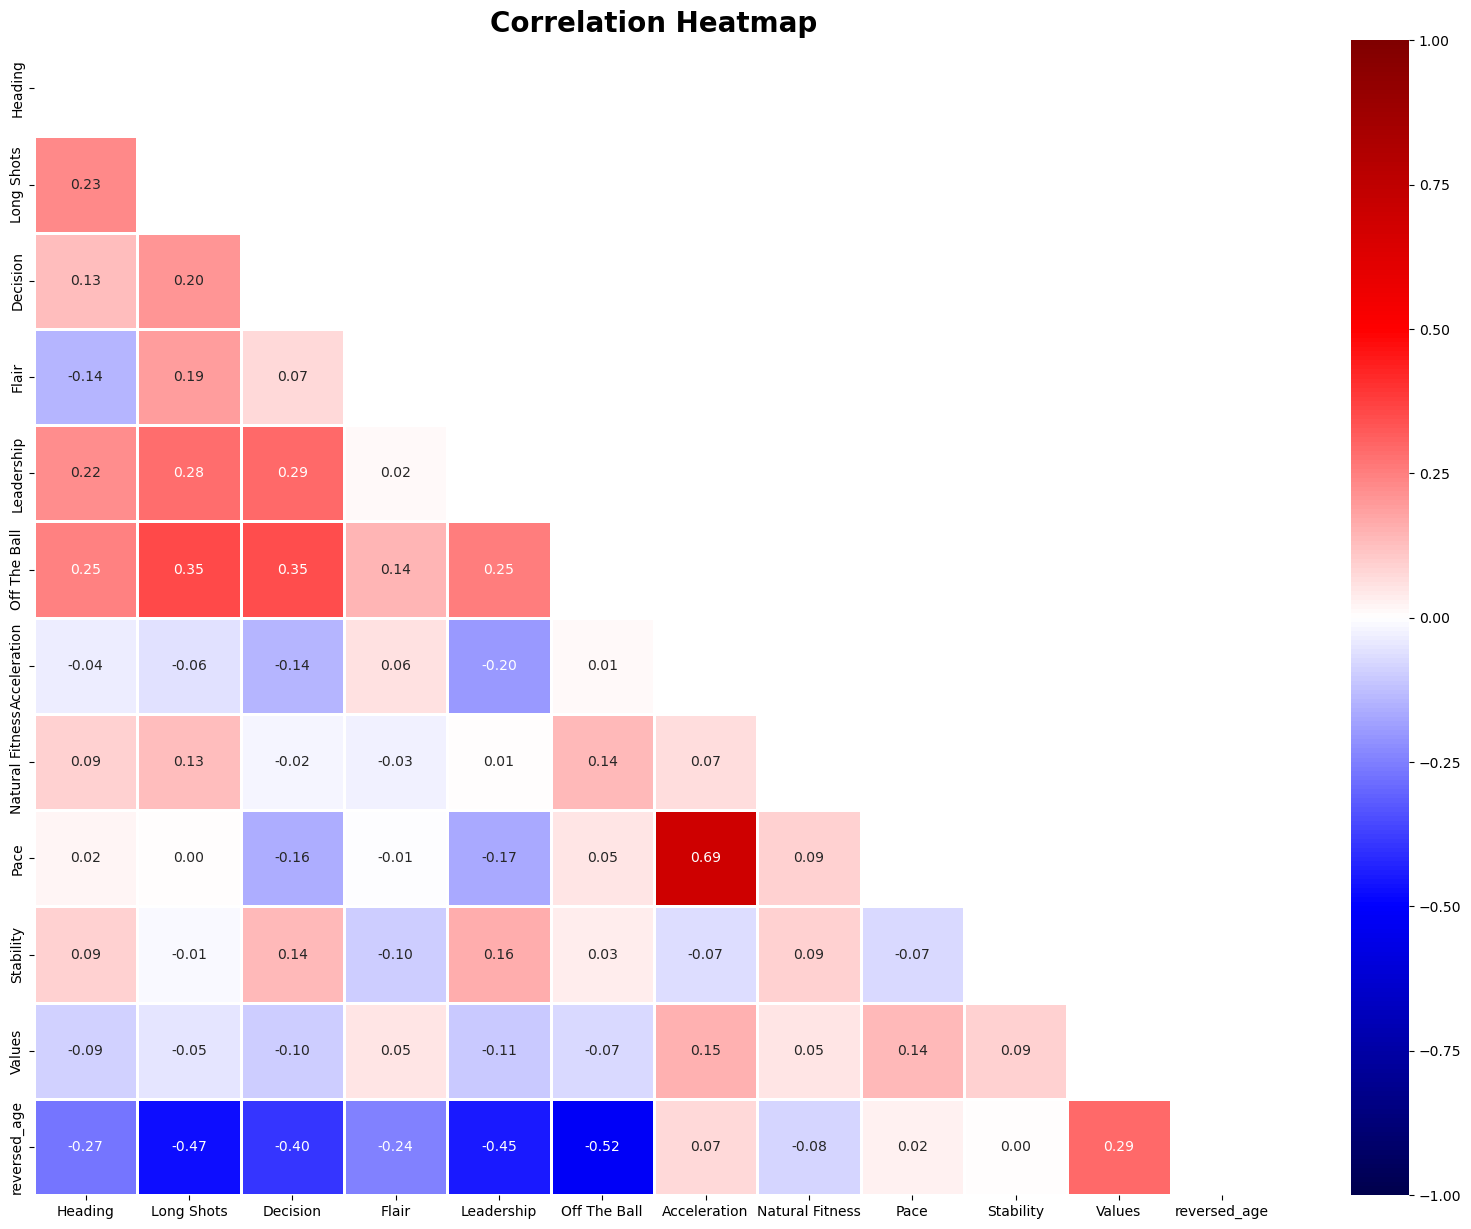

In [21]:

fig = plt.figure(figsize=[20,15])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
#plt.savefig('heatmap1.png',transparent=True, bbox_inches='tight')

Split

Feature Selection

In [22]:
X = amr_df2.copy()
values = X.pop("Values")
y = np.log10(values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Selection - Variance

In [23]:
range_var_df = (pd.DataFrame({
                'Range': X_train.max() - X_train.min(),
                'Variance': X_train.var()})
                .sort_values(by='Variance'))

In [24]:
range_var_df.head()

,Range,Variance
Pace,9,1.868605
Acceleration,10,2.290961
Decision,12,3.772781
Off The Ball,13,4.147072
Flair,13,4.223489


In [25]:
range_var_df.tail()

,Range,Variance
Natural Fitness,13,5.266912
Stability,15,5.892964
Heading,15,6.232710
Leadership,17,10.081503
reversed_age,26,27.281011


In [26]:
""" from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
import multiprocessing
import time

# Assuming you have X_train, y_train defined somewhere

param_grid_rf = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5, 10]
}
param_grid_knn = {
    "classifier__n_neighbors": list(range(3, 30)),
    "classifier__weights": ['uniform', 'distance'],
    "classifier__p": [1, 2]
}
param_grid_svm = {
    "classifier__C": [0.1, 1, 10],
    "classifier__epsilon": [0.1, 0.01, 0.001],
    "classifier__kernel": ["linear", "rbf", "poly"]
}

param_grid_dt = {
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5, 10]
}

param_grid_lr = {
    # Add linear regression parameters if needed
}

param_grid_gb = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__max_depth": [3, 5, 7]
}

# List of classifiers and their corresponding parameter grids
classifiers = [
    SVR(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    GradientBoostingRegressor()
]

param_grids = [
    param_grid_svm,
    param_grid_rf,
    param_grid_knn,
    param_grid_dt,
    param_grid_lr,
    param_grid_gb
]

best_classifier = None
best_score = float('-inf')  # Initialize with a very low value

# Perform RandomizedSearchCV for each classifier
for classifier, param_grid in zip(classifiers, param_grids):
    start_time = time.time()

    model_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('classifier', classifier)
    ])

    search = RandomizedSearchCV(
        model_pipeline,
        param_grid,
        n_iter=50,
        cv=5,
        random_state=123,
        n_jobs=multiprocessing.cpu_count() - 1
    )
    search.fit(X_train, y_train)

    if search.best_score_ > best_score:
        best_score = search.best_score_
        best_classifier = classifier.__class__.__name__

# Print the best classifier and its best score
print(f"Best Classifier: {best_classifier}")
print(f"Best Score: {best_score}")
 """

' from sklearn.svm import SVR\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.decomposition import PCA\nfrom sklearn.model_selection import RandomizedSearchCV\nimport multiprocessing\nimport time\n\n# Assuming you have X_train, y_train defined somewhere\n\nparam_grid_rf = {\n    "classifier__n_estimators": [50, 100, 200],\n    "classifier__max_depth": [None, 10, 20],\n    "classifier__min_samples_split": [2, 5, 10]\n}\nparam_grid_knn = {\n    "classifier__n_neighbors": list(range(3, 30)),\n    "classifier__weights": [\'uniform\', \'distance\'],\n    "classifier__p": [1, 2]\n}\nparam_grid_svm = {\n    "classifier__C": [0.1, 1, 10],\n    "classifier__epsilon": [0.1, 0.01, 0.001],\n    "classifier__kernel": ["

ML

In [27]:
from xgboost import XGBRegressor

model_pipeline = make_pipeline(#StandardScaler(), 
                               XGBRegressor(random_state=123))
#y_scaler = StandardScaler()
#y_train_standardized = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

param_grid = {
    "xgbregressor__n_estimators": [100, 300, 500],
    "xgbregressor__max_depth": [3, 5, 7],
    "xgbregressor__learning_rate": [0.01, 0.1, 0.2],
    #"xgbregressor__subsample": [0.8, 0.9, 1.0],
    #"xgbregressor__colsample_bytree": [0.8, 0.9, 1.0],
    #"xgbregressor__gamma": [0, 0.1, 0.2],
    #"xgbregressor__min_child_weight": [1, 3, 5]
}


search = GridSearchCV(model_pipeline,
                          param_grid,
                          scoring="neg_mean_absolute_percentage_error",
                          cv=5,
                          n_jobs=-1)

search.fit(X_train, y_train)

best_score_search_xgb = search.best_score_

print(f"{best_score_search_xgb} MAPE")


-0.06306849930081965 MAPE


Metric

In [28]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [29]:
dt_predictions = search.predict(X_test)

In [30]:
dt_mae = mean_absolute_error(y_true = y_test, y_pred = dt_predictions)
dt_rmse = mean_squared_error(y_true = y_test, y_pred = dt_predictions, squared=False)
dt_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = dt_predictions)
dt_r2 = r2_score(y_true = y_test, y_pred = dt_predictions)

In [31]:
pd.DataFrame({"MAE": [dt_mae],
              "RMSE": [dt_rmse],
              "MAPE": [dt_mape],
              "R2": [dt_r2]},
             index=["svr"])

,MAE,RMSE,MAPE,R2
svr,0.402295,0.50081,0.061197,0.177093


In [32]:

# Create a new DataFrame for predictions and actual values
results_df = pd.DataFrame({'Predicted Market Value tree': 10**dt_predictions ,
                           'Actual Market Value': 10**y_test}).sort_values(by='Actual Market Value', ascending=False)

In [33]:
results_df.round(2)

,Predicted Market Value tree,Actual Market Value
500,3.954670e+06,48750001.0
24,5.309292e+06,45540002.0
580,5.509083e+06,38509256.0
532,1.299002e+07,38045289.0
558,8.924609e+06,36954967.0
...,...,...
328,3.364713e+06,346279.0
669,3.020058e+06,268126.0
135,6.872192e+05,214485.0
329,7.732306e+05,161973.0


In [34]:
results_df2 = results_df.merge(amr_df, how='left', left_index=True, right_index=True)


In [35]:
results_df2["Predicted Market Value tree"] = results_df2["Predicted Market Value tree"].round(2)
results_df2["Predicted Market Value tree"] = results_df2["Predicted Market Value tree"].round(2).astype(int)
results_df2


,Predicted Market Value tree,Actual Market Value,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
500,3954670,48750001.0,Mohamed Taabouni,M/AM LC,20,106,-75,Feyenoord Rotterdam,11,11,14,11,13,12,4,11,3,5,13,12,5,14,10,12,11,12,8,14,10,14,15,5,11,6,8,9,13,15,12,6,12,12,11,6,9,7,13,4,11,1,2,3,1,1,3,3,2,1,4,3,13,11,5,10,10,11,11,10,1,1,1,1,1,1,1,18,19,12,18,20,12,1,178,67,10,20,48750001,37065532,AMC
24,5309292,45540002.0,Takefusa Kubo,M/AM RC,21,143,159,Real San Sebastián,14,12,15,14,15,12,7,11,8,6,15,8,6,15,8,15,12,14,14,15,15,7,15,7,14,7,15,14,14,14,15,7,10,12,13,12,14,6,11,10,11,3,1,1,1,2,1,1,2,3,2,2,13,13,2,10,9,13,11,13,1,1,1,1,1,1,1,1,12,16,1,20,15,15,167,60,20,11,45540002,45104608,AMC
580,5509083,38509256.0,Luke Harris,M/AM C,17,93,-8,Fulham,12,11,12,14,8,10,5,10,4,8,13,9,8,10,5,10,9,10,11,10,10,15,12,10,11,6,10,12,15,7,11,9,11,12,11,10,10,10,10,5,16,1,1,3,4,1,3,2,1,2,1,2,12,12,4,11,13,10,13,17,1,1,1,1,1,1,1,1,16,1,12,20,12,1,177,0,11,20,38509256,2000141316,AMC
532,12990019,38045289.0,Wanya Marçal-Madivádua,M/AM LC,19,100,-75,Leicester City,10,11,12,10,12,10,8,12,8,10,12,7,8,12,9,10,10,11,12,11,9,5,15,8,10,9,12,13,12,6,12,8,8,14,13,10,20,11,6,13,9,4,3,3,3,1,3,3,1,3,2,1,10,11,2,11,13,13,9,16,1,1,1,1,14,10,1,15,18,1,15,20,14,1,181,76,12,20,38045289,28127132,AMC
558,8924609,36954967.0,James Balagizi,M/AM LC,18,97,-75,Liverpool,8,11,13,9,13,10,11,8,8,7,13,9,7,14,11,10,8,12,8,12,9,11,12,7,12,7,8,11,13,12,11,9,12,12,10,11,11,9,11,9,13,2,3,1,2,1,2,2,2,2,2,1,12,13,10,10,11,11,10,11,1,1,1,1,1,1,14,1,18,1,19,20,14,13,186,0,8,20,36954967,2000049211,AMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,3364712,346279.0,Mariano Vázquez,AM C,29,122,128,Asociación Deportivo Pasto,12,12,13,11,13,13,10,10,4,4,13,13,4,13,13,11,10,12,13,13,13,12,13,11,15,10,12,14,13,14,12,7,12,12,13,12,11,7,12,5,12,3,2,3,1,2,1,3,2,3,1,2,10,12,7,11,10,9,9,17,1,1,1,1,1,1,1,1,10,1,1,20,10,1,174,71,20,12,346279,14083142,AMC
669,3020058,268126.0,Thalys,AM RC,17,71,-75,SEP,5,7,12,12,9,5,6,7,5,3,10,6,6,12,12,6,6,7,5,12,12,11,13,9,12,6,6,7,12,12,6,10,14,12,12,3,7,12,15,11,9,1,3,1,3,1,1,1,1,1,3,3,11,11,6,10,9,13,10,14,1,1,1,1,1,1,1,7,12,7,12,20,18,15,184,0,20,9,268126,2000221580,AMC
135,687219,214485.0,Dorlan Pabón,AM/S RLC,34,129,147,Atlético Nacional S.A.,13,13,14,13,13,14,10,14,7,6,13,12,6,13,7,13,12,12,13,14,13,15,13,12,14,9,12,11,13,13,12,7,13,12,12,8,12,6,14,5,12,1,3,1,3,1,3,2,1,2,1,3,13,15,10,6,13,10,13,12,1,1,1,1,1,1,1,1,1,1,15,20,15,16,170,69,14,20,214485,76003032,AMC
329,773230,161973.0,Andrés Andrade,AM RLC,33,122,132,Atlético Nacional S.A.,13,12,12,12,13,12,10,14,4,6,13,8,5,13,5,13,11,12,13,13,12,12,13,9,13,9,12,13,13,13,12,11,13,13,12,12,11,6,9,5,12,1,1,2,3,1,3,2,2,1,1,3,11,13,11,13,11,12,11,11,1,1,1,1,1,1,1,1,1,1,15,20,15,12,184,73,12,20,161973,76013954,AMC


THE DAMN PREDICTION


In [36]:
df_predict_og = df_original.loc[df_original["Values"] > 50000000]
df_predict = df_predict_og

In [37]:
df_predict.drop(["Nationality","Rental club","Salary","Colour of skin","Date of birth","Number of national team appearances","Goals scored for the national team","Race","World reputation","Domestic reputation","Current reputation","RCA" ], axis=1,inplace=True)

/var/folders/dp/sb0zbjrn4y70c9_f08rwfmx00000gn/T/ipykernel_9362/1369094623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict.drop(["Nationality","Rental club","Salary","Colour of skin","Date of birth","Number of national team appearances","Goals scored for the national team","Race","World reputation","Domestic reputation","Current reputation","RCA" ], axis=1,inplace=True)


In [38]:
df_predict = pd.DataFrame(df_predict)

columns_to_check = {
    "GK", "DL", "DC", "DR", "WBL", "WBR", "DM", "ML", "MC", "MR", "AML", "AMC", "AMR", "ST"
}

def find_column_name(row):
    for col_name in columns_to_check:
        if row[col_name] == 20:
            return col_name
    return None

df_predict['Best_Position'] = df_predict.apply(find_column_name, axis=1)

In [39]:
amr_df_predict = df_predict[(df_predict["Best_Position"] == "AMC")]
amr_df_predict = amr_df_predict.reset_index(drop=True)
amr_df_predict.head(50)

,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
0,Kevin De Bruyne,M/AM RLC,31,189,189,Manchester City,14,19,15,16,16,17,6,17,7,9,18,16,9,18,12,14,13,15,15,20,18,17,16,13,14,11,14,15,15,13,14,10,16,14,17,13,15,6,15,7,14,1,3,1,3,3,3,3,3,3,2,1,13,17,13,14,11,18,16,13,1,1,1,1,1,1,12,15,20,15,14,20,14,12,181,68,16,20,347975206,18004457,AMC
1,Bernardo Silva,M/AM RC,27,176,180,Manchester City,14,15,17,15,17,13,10,13,2,12,17,13,8,18,13,16,15,16,15,17,15,16,17,12,17,13,16,20,15,19,16,7,17,14,17,9,16,10,16,6,13,2,2,1,3,2,1,1,1,2,2,2,15,17,14,11,13,17,12,8,1,1,1,1,1,1,1,12,20,16,12,20,19,9,173,64,20,8,347975206,55041632,AMC
2,Thomas Müller,AM RC,32,171,174,FC Bayern München,11,17,11,13,13,7,14,10,8,9,16,13,11,13,17,20,13,16,16,18,16,18,13,17,20,11,20,17,12,12,13,13,20,14,19,11,16,9,17,2,18,2,3,2,2,1,1,1,1,3,1,1,10,17,10,20,19,16,10,10,1,1,1,1,1,1,10,10,14,15,11,20,18,15,185,76,13,20,347975206,35011448,AMC
3,Kai Havertz,AM/S C,23,167,180,Chelsea,11,12,14,16,18,11,13,11,8,7,14,12,10,17,11,15,11,17,10,17,16,10,15,7,17,10,15,13,13,13,13,14,16,17,15,13,13,6,16,4,16,2,2,3,1,3,3,3,2,3,2,3,12,14,5,12,16,15,15,19,1,1,1,1,1,1,10,12,14,14,12,20,14,19,186,77,20,10,305612129,91151081,AMC
4,Bruno Fernandes,M/AM C,27,166,174,Manchester UFC,16,16,11,15,17,16,10,16,4,3,17,19,8,17,18,16,17,15,14,18,10,17,17,17,17,6,15,15,13,15,13,9,18,14,19,10,12,13,13,3,15,1,1,2,3,3,3,1,1,3,1,1,18,15,5,13,14,17,6,7,1,1,1,1,1,1,1,10,16,10,12,20,14,10,179,69,13,20,265261481,43124203,AMC
5,Mason Mount,AM RLC,23,165,170,Chelsea,14,12,11,14,15,14,9,12,5,7,15,15,11,15,14,14,15,15,12,12,16,18,13,12,17,14,18,20,15,13,10,9,15,15,20,11,12,6,14,8,12,1,3,2,2,1,3,4,3,2,3,3,16,18,6,13,14,16,16,17,1,1,1,1,1,1,14,1,15,1,16,20,15,1,178,70,12,20,126331239,28103590,AMC
6,Martin Ødegaard,M/AM C,23,160,178,Arsenal,14,14,16,12,17,15,9,13,7,10,16,10,8,17,7,18,10,15,12,17,16,15,16,14,16,9,17,14,14,16,15,9,13,13,15,11,11,4,12,7,13,1,1,3,2,1,3,1,1,3,1,2,13,16,6,12,14,18,13,14,1,1,1,1,1,1,13,10,18,13,10,20,14,8,178,68,20,10,272952661,53095137,AMC
7,Pedri,M/AM RLC,19,159,176,Barcelona,9,14,17,11,18,9,7,11,6,6,17,11,9,17,11,17,11,16,15,18,16,14,18,9,13,9,13,15,14,15,13,8,16,13,16,9,15,5,13,5,15,1,1,2,1,2,3,2,2,4,2,3,12,14,3,14,13,15,15,17,1,1,1,1,1,1,1,12,20,14,15,20,16,5,174,65,10,20,96009385,67293495,AMC
8,João Félix,AM/S RLC,22,159,177,A. Madrid,11,12,17,15,16,12,12,13,4,4,17,14,7,18,14,15,11,15,13,16,16,16,19,7,18,6,12,11,13,15,13,9,14,12,12,9,12,14,15,9,8,2,1,2,1,1,3,1,2,1,4,2,15,18,13,8,17,15,10,10,1,1,1,1,1,1,1,12,10,12,18,20,15,19,178,74,15,20,95220000,83169822,AMC
9,Christopher Nkunku,M/AM RLC,24,158,163,RB Leipzig,14,13,14,14,14,14,6,13,7,7,16,11,7,15,14,15,12,16,15,15,16,11,15,6,15,7,16,15,15,15,13,9,14,15,16,11,15,11,13,4,18,3,3,2,3,2,1,2,1,2,2,2,8,12,8,12,10,13,14,14,1,1,1,1,1,10,1,15,17,15,16,20,17,14,175,73,12,20,65000001,85140301,AMC


In [40]:
amr_df2_predict = amr_df_predict[['ca','Age','Values','Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Position.1', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability',
       'diversity', ]].applymap(lambda x: np.nan if x < 0 else x).dropna()

In [41]:
amr_df2_predict = amr_df2_predict.loc[:, AMR_essential_ft]

In [42]:
amrf_df__predict_values = amr_df2_predict.pop("Values")


In [43]:
max_age = amr_df2_predict['Age'].max()
amr_df2_predict['reversed_age'] = max_age - amr_df2_predict['Age']
amr_df2_predict.drop(columns=['Age'], inplace=True)

In [44]:
dt_predictions_50 = search.predict(amr_df2_predict)

In [45]:
dt_predictions_50=10**dt_predictions_50

In [46]:
len(dt_predictions_50)

87

In [47]:
amr_df_predict["Values Predicted"] = dt_predictions_50.round(2).astype(int)

In [54]:
amr_df_predict.head()

,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,UID,Best_Position,Values Predicted
0,Kevin De Bruyne,M/AM RLC,31,189,189,Manchester City,14,19,15,16,16,17,6,17,7,9,18,16,9,18,12,14,13,15,15,20,18,17,16,13,14,11,14,15,15,13,14,10,16,14,17,13,15,6,15,7,14,1,3,1,3,3,3,3,3,3,2,1,13,17,13,14,11,18,16,13,1,1,1,1,1,1,12,15,20,15,14,20,14,12,181,68,16,20,18004457,AMC,2666487
1,Bernardo Silva,M/AM RC,27,176,180,Manchester City,14,15,17,15,17,13,10,13,2,12,17,13,8,18,13,16,15,16,15,17,15,16,17,12,17,13,16,20,15,19,16,7,17,14,17,9,16,10,16,6,13,2,2,1,3,2,1,1,1,2,2,2,15,17,14,11,13,17,12,8,1,1,1,1,1,1,1,12,20,16,12,20,19,9,173,64,20,8,55041632,AMC,41698508
2,Thomas Müller,AM RC,32,171,174,FC Bayern München,11,17,11,13,13,7,14,10,8,9,16,13,11,13,17,20,13,16,16,18,16,18,13,17,20,11,20,17,12,12,13,13,20,14,19,11,16,9,17,2,18,2,3,2,2,1,1,1,1,3,1,1,10,17,10,20,19,16,10,10,1,1,1,1,1,1,10,10,14,15,11,20,18,15,185,76,13,20,35011448,AMC,2303972
3,Kai Havertz,AM/S C,23,167,180,Chelsea,11,12,14,16,18,11,13,11,8,7,14,12,10,17,11,15,11,17,10,17,16,10,15,7,17,10,15,13,13,13,13,14,16,17,15,13,13,6,16,4,16,2,2,3,1,3,3,3,2,3,2,3,12,14,5,12,16,15,15,19,1,1,1,1,1,1,10,12,14,14,12,20,14,19,186,77,20,10,91151081,AMC,9020482
4,Bruno Fernandes,M/AM C,27,166,174,Manchester UFC,16,16,11,15,17,16,10,16,4,3,17,19,8,17,18,16,17,15,14,18,10,17,17,17,17,6,15,15,13,15,13,9,18,14,19,10,12,13,13,3,15,1,1,2,3,3,3,1,1,3,1,1,18,15,5,13,14,17,6,7,1,1,1,1,1,1,1,10,16,10,12,20,14,10,179,69,13,20,43124203,AMC,13735035


In [51]:
amr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 87 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 682 non-null    object
 1   Position             682 non-null    object
 2   Age                  682 non-null    int64 
 3   ca                   682 non-null    int64 
 4   pa                   682 non-null    int64 
 5   Club                 682 non-null    object
 6   Corners              682 non-null    int64 
 7   Crossing             682 non-null    int64 
 8   Dribbling            682 non-null    int64 
 9   Finishing            682 non-null    int64 
 10  First Touch          682 non-null    int64 
 11  Free Kick Taking     682 non-null    int64 
 12  Heading              682 non-null    int64 
 13  Long Shots           682 non-null    int64 
 14  Long Throws          682 non-null    int64 
 15  Marking              682 non-null    int64 
 16  Passing 

In [52]:
amr_df_predict.drop("Values",inplace=True, axis=1)

In [56]:
amr_df_predict.rename(columns={"Values Predicted": "Values"}, inplace=True)


In [62]:
amr_df_predict = pd.concat([amr_df, amr_df_predict], ignore_index=True)


In [66]:
import pickle

with open('amr_df_predict.pickle', 'wb') as f:
    pickle.dump(amr_df_predict, f)
    